In [0]:
from google.colab import drive


In [3]:
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


done in 4.735s.


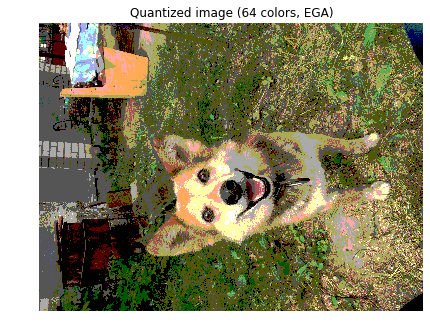

done in 13.009s.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from sklearn import tree
from time import time
from PIL import Image


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

#Вектор значений цветов из нашей библиотеки 

X = [[0, 0, 0], [0, 0, 170], [0, 170, 0], [0, 170, 170],
[170, 0, 0], [170, 0, 170], [170, 170, 0],
[170, 170, 170], [0, 0, 85], [0, 0, 255],
[0, 170, 85], [0, 170, 255], [170, 0, 85],
[170, 0, 255], [170, 170, 85], [170, 170, 255],
[0, 85, 0], [0, 85, 170], [0, 255, 0], [0, 255, 170],
[170, 85, 0], [170, 85, 170], [170, 255, 0],
[170, 255, 170], [0, 85, 85], [0, 85, 255],
[0, 255, 85], [0, 255, 255], [170, 85, 85],
[170, 85, 255], [170, 255, 85], [170, 255, 255],
[85, 0, 0], [85, 0, 170], [85, 170, 0],
[85, 170, 170], [255, 0, 0], [255, 0, 170],
[255, 170, 0], [255, 170, 170], [85, 0, 85],
[85, 0, 255], [85, 170, 85], [85, 170, 255],
[255, 0, 85], [255, 0, 255], [255, 170, 85],
[255, 170, 255], [85, 85, 0], [85, 85, 170],
[85, 255, 0], [85, 255, 170], [255, 85, 0],
[255, 85, 170], [255, 255, 0], [255, 255, 170],
[85, 85, 85], [85, 85, 255], [85, 255, 85],
[85, 255, 255], [255, 85, 85], [255, 85, 255],
[255, 255, 85], [255, 255, 255]]
t0= time()

#Формальные имена классам - от 0 до 63
Y = list(range(64))

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# Переводим в адекватный для алгоритма формат - массив-матрицу
im = Image.open("your photo")
w,h,d = np.array(im).shape
image_array = np.array(im) 
image_array = np.reshape(image_array, (w*h,d))
predictions = clf.predict(image_array)

#смотрим на результат 

print("done in %0.3fs."%(time()- t0))

plt.figure(0)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, EGA)')
plt.imshow(recreate_image(np.array(X)/255, predictions, w, h))
plt.show()

print("done in %0.3fs."%(time()- t0))